In [758]:
# MAAZAZ ZAKARIA
# GLSID

In [759]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [760]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_der(x):
    return x * (1.0 - x)

def tanh(x):
    return np.tanh(x)

def tanh_der(x):
    return 1 - np.power(x, 2)

def relu(x):
    return np.maximum(0,x)

def relu_der(x):
    return 1 * (x > 0)

def softmax(x):
    exps = np.exp(x)
    sums = np.sum(exps)
    return np.divide(exps, sums)
    
fun_dict = {'sigmoid': {'activation': sigmoid,
                        'derivative': sigmoid_der},
            'tanh': {'activation': tanh,
                     'derivative': tanh_der},
            'relu':{'activation': relu,
                     'derivative': relu_der}}

In [761]:
class MultiLayerNN:
    def __init__(self, activate_function, inputNeuronsCount, hiddenNeuronsCount, outputNeuronsCount):
        self.activation = fun_dict[activate_function]['activation']
        self.activation_der = fun_dict[activate_function]['derivative']
        self.inputNeuronsCount = inputNeuronsCount
        self.hiddenNeuronsCount = hiddenNeuronsCount
        self.outputNeuronsCount = outputNeuronsCount
        self.hidden_weights = np.random.uniform(0, 1, size=(self.inputNeuronsCount,self.hiddenNeuronsCount))
        self.hidden_bias = np.random.uniform(0, 1, size=(1, self.hiddenNeuronsCount))
        self.output_weights = np.random.uniform(0, 1, size=(self.hiddenNeuronsCount, self.outputNeuronsCount))
        self.output_bias = np.random.uniform(0, 1, size=(1, self.outputNeuronsCount))
      
    # error function
    def function_loss(self, yp, y):
        return (1/2)*pow(y-yp,2)
        
    def fit(self, inputs, y, iterations, learningrate):
        for i in range(iterations):
            # Forward Pass
            hidden_layer_in = np.dot(inputs, self.hidden_weights) + self.hidden_bias
            hidden_layer_out = self.activation(hidden_layer_in)
            output_layer_in = np.dot(hidden_layer_out, self.output_weights) + self.output_bias
            y_predicted_output = self.activation(output_layer_in)
            # Backward pass
            error = y_predicted_output - y
            d_predicted_output = error * self.activation_der(predicted_output)
            error_hidden_layer = d_predicted_output.dot(self.output_weights.T)
            d_hidden_layer = error_hidden_layer * self.activation_der(hidden_layer_out)
            # optimise Weights and Biases
            self.output_weights = self.output_weights - hidden_layer_out.T.dot(d_predicted_output) * learningrate
            self.output_bias = self.output_bias - np.sum(d_predicted_output,axis=0,keepdims=True) * learningrate
            self.hidden_weights = self.hidden_weights - inputs.T.dot(d_hidden_layer) * learningrate
            self.hidden_bias = self.hidden_bias - np.sum(d_hidden_layer,axis=0,keepdims=True) * learningrate
            
    def predict(self, inputs):
        hidden_layer_in = np.dot(inputs, self.hidden_weights) + self.hidden_bias
        hidden_layer_out = self.activation(hidden_layer_in)
        output_layer_in = np.dot(hidden_layer_out, self.output_weights) + self.output_bias
        outpuy_layer_out = self.activation(output_layer_in)
        return outpuy_layer_out

In [762]:
inputNeuronsCount = 2
hiddenNeuronsCount = 4
outputNeuronsCount = 1

rand = np.random.RandomState(0)
X = rand.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), dtype=int)

NN = MultiLayerNN('sigmoid', inputNeuronsCount, hiddenNeuronsCount, outputNeuronsCount)
NN.fit(X, y.reshape(-1,1), 10000, 0.1)
predicted_output = NN.predict(X)
loss= NN.function_loss(predicted_output,y.reshape(-1,1))

In [763]:
np.sum(loss)

15.393213396858558

In [764]:
predicted_output

array([[2.78159131e-15],
       [1.50308257e-02],
       [9.58910809e-01],
       [5.09076334e-01],
       [9.34829139e-01],
       [5.41016756e-03],
       [2.98208371e-05],
       [1.48367478e-06],
       [2.73175406e-07],
       [8.97209402e-01],
       [9.99998960e-01],
       [9.69232221e-01],
       [9.70687265e-01],
       [7.73360590e-01],
       [1.51711918e-05],
       [3.22083668e-03],
       [2.40804885e-05],
       [9.44093072e-01],
       [1.27243014e-07],
       [6.13747642e-02],
       [6.97416337e-06],
       [3.20605168e-05],
       [1.03440451e-02],
       [9.99999494e-01],
       [1.22958050e-01],
       [9.99998963e-01],
       [4.32030119e-03],
       [3.63725179e-01],
       [4.91207400e-01],
       [3.09466892e-03],
       [2.05043227e-03],
       [6.36135841e-05],
       [8.46229239e-01],
       [9.99999360e-01],
       [6.93676938e-01],
       [5.27224706e-05],
       [9.74774519e-01],
       [9.26695758e-01],
       [9.91070504e-05],
       [7.07322576e-01],


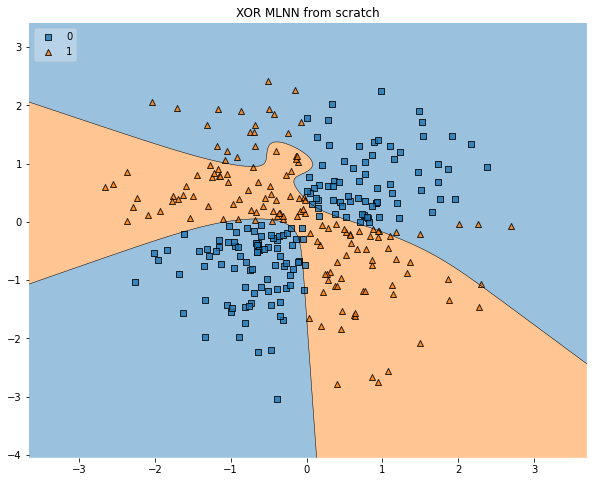

In [765]:
fig = plt.figure(figsize=(10,8))
fig = plot_decision_regions(X=X, y=y, clf=NN, legend=2)
plt.title("XOR MLNN from scratch")
plt.show()